<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Firstmidterm2022.do.txt --no_mako -->
<!-- dom:TITLE: PHY321: Classical Mechanics 1 -->

# Midterm 2 (Due 5 Apr)

Date: **25 Mar 24**

## Introduction to the second midterm project, total score 100 points

The relevant reading background is:

1. chapters 4-5 of Taylor.
2. chapters 6-8 of Boas.

In this midterm project we will start modeling an oscillator. We pull together many of the elements we have used in our analysis of oscillators to do so. There is substantial extra credit for this midterm project and it involves some advanced analysis that we have not done. This is a good opportunity to learn something new and interesting. The second problem is a relatively standard signal processing problem, which is a little different than the examples we have done in class.

### Practicalities about midterm projects

You can work in groups (optimal groups are often 2-3 people) or by yourself. If you work as a group, you **must** hand in your own work. **Remember to write your name(s)** and indicate how each person contributed.

Midterms might cover topics from prior homework, lectures, and readings. It is likely that some of the problems might require a little research on your own or might be slightly beyond what we have done on class and in homework. The midterm is meant to be challenging, but it should also be a good place to learn more about the topics covered in the course. We encourage you to use the textbook, notes, and other resources when solving the midterm. Of course, you can also work with others on the midterm, but make sure you write up the solutions yourself. You can ask the any of the teaching staff for help.

### Part 1, The Duffing Oscillator (60pt)

Consider the following equation of motion for a damped and driven oscillator that is not necessarily linear. This is the [Duffing equation](https://en.wikipedia.org/wiki/Duffing_equation), which describes a damped driven simple harmonic oscillator with a cubic non-linearity. It's equation of motion is given by:

$$\ddot{x} + \delta \dot{x} + \alpha x + \beta x^3 = \gamma \cos(\omega t).$$

where $\alpha$, $\beta$, $\delta$, $\gamma$, and $\omega$ are constants.

Below is a figure showing the [strange attractor](https://en.wikipedia.org/wiki/Attractor#Strange_attractor) of the Duffing Oscillator over four periods. It is locally chaotic, but globally it is stable. This is a common feature of non-linear systems.

![Strange attractor](https://upload.wikimedia.org/wikipedia/commons/f/fc/Duffing_oscillator_strange_attractor_with_color.gif)

We focus on this one dimensional case, but we will analyze it in parts to put together a full picture of the dynamics of the system. If you are looking for useful parameter choices and initial conditions, we suggest using those listed on [the Wikipedia page](https://en.wikipedia.org/wiki/Duffing_equation).

Recall that the potential for this system can give rise to different kinds of behavior depending on the parameters. The figure below shows the potential for different choices of $\alpha$ and $\beta$. Make sure you choose your parameters to match the potential you want to study - pick a stable well for solving for trajectories.

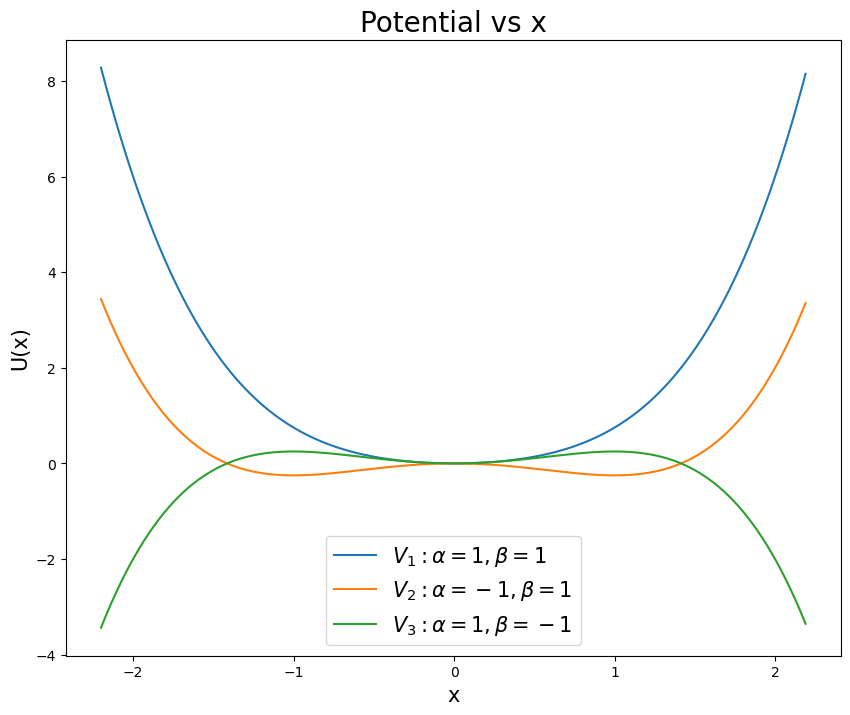

#### Undamped and undriven case (20 points)

1. (5 pt) Consider the undriven and undamped case, $\delta = \gamma = 0$. What potential would give rise to this kind of equation of motion? Demonstrate that potential gives the expected equation of motion.

<div style="background-color:PaleGreen;color:black;padding:2%;">

The duffing equation is $\ddot{x} + \delta \dot{x} + \alpha x + \beta x^3 = \gamma \cos(\omega t)$. This becomes the nonlinear equation

$$
\ddot{x} + \alpha x + \beta x^3 = 0 \\
\ddot{x} = -\alpha x -\beta x^3\\
F(x) =  -m\alpha x -m\beta x^3 \\
U(x)/m = -\frac{1}{m}\int F(x)dx = \frac{1}{2}\alpha x^2 + \frac{1}{4}\beta x^4
$$

neglecting c since potential doesn't care. Since m only scales the graph and has no affect on the shape of answers, we'll use m=1 going forward. 

</div>

2. (5 pt) Find the equilibrium points of the system for the undriven and undamped case. What are the conditions for stable and unstable equilibrium points? Plot the potential for some choices of $\alpha$ and $\beta$ to illustrate your findings.

<div style="background-color:PaleGreen;color:black;padding:2%;">

When $dU/dx = 0$, an equilibrium point occurs. This is stable if U is greater at each side of this point ($\frac{d^2U}{dx^2} > 0$) and otherwise unstable. 

$$
U(x) = \frac{1}{2}\alpha x + \frac{1}{4}\beta x^4 \\
U'(x) = -F = \alpha x + \beta x^3 \\
U''(x) = \alpha + 3\beta x ^2 
$$

This yields the stable points

$$
U'(x) = 0 = \alpha x + \beta x^3 \\
-\alpha = \beta x^2 \\
x = \pm\sqrt{\frac{-\alpha}{\beta}} $$

Apparently there is an imaginary stable point when $\alpha$ and $\beta$ have the same sign, and one at $x = \pm\sqrt{\left|\frac{\alpha}{\beta}\right|} $ when they do not. Also there is a stable point for $x=0$


$$
U''(0) = \alpha \\
U''\left(\pm \sqrt{\frac{\alpha}{\beta}}\right) = \sout{\alpha +3 \beta \frac{\alpha}{\beta} = 4\alpha}
$$
Things are simple when $x=0$, it is stable for $\alpha >0$. Lets remember our absolute values for $\alpha/\beta$

$$
U''\left(\pm \sqrt{\frac{\alpha}{\beta}}\right) = \alpha + 3\beta \left|\frac{\alpha}{\beta} \right| \\
= \pm \alpha \mp 3 \alpha = \mp 2 \alpha
$$
For positive $\alpha$, this yields a negative $\beta$ and negative $U''$. As such, it is stable for negative $\beta$ and unstable for positive $\beta$

I'll use the same values as above
$$
U_1 \rightarrow \alpha = 1,\ \beta = 1  \\
U_2 \rightarrow \alpha = -1,\ \beta = 1 \\
U_3 \rightarrow \alpha = 1,\ \beta = -1 
$$

</div>



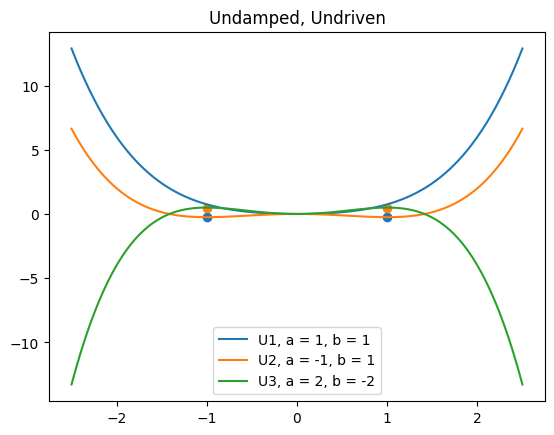

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def duffing_pot(x, alpha, beta):
    return alpha * x ** 2 / 2 + beta * x ** 4 / 4

xrange = np.linspace(-2.5,2.5,100)

ab = [[1,1,1],[2,-1,1],[3,2,-2]]
for i, a, b in ab:
    plt.plot(xrange, duffing_pot(xrange,a,b), label = f'U{i}, a = {a}, b = {b}')
    if a/b < 0:
        plt.scatter((-1,1),(duffing_pot(-1,a,b),duffing_pot(1,a,b)))
plt.title('Undamped, Undriven')
plt.legend()
plt.show()

The benefit of using the same values as above is that it also serves as a check that everything I've done up to this point is correct! The plot confirms my findings



3. (5 pt) Plot the phase space for the undriven and undamped case. What are the trajectories of the system? What is the behavior of the system? Does it match your expectations from the potential? *The figure above only starts this discussion.*

<div style="background-color:PaleGreen;color:black;padding:2%;">

See plot below. It appears to We get some pretty fun trajectories but one can remember the potential energy well picture along side the stable point picture. If the edge critical points are stable, all initial conditions will oscillate since the well has infinite height. This is true for positive $\beta$. For negative $\beta$, oscillation only occurs if the particle gets trapped in a smaller well, and will otherwise diverge.

</div>



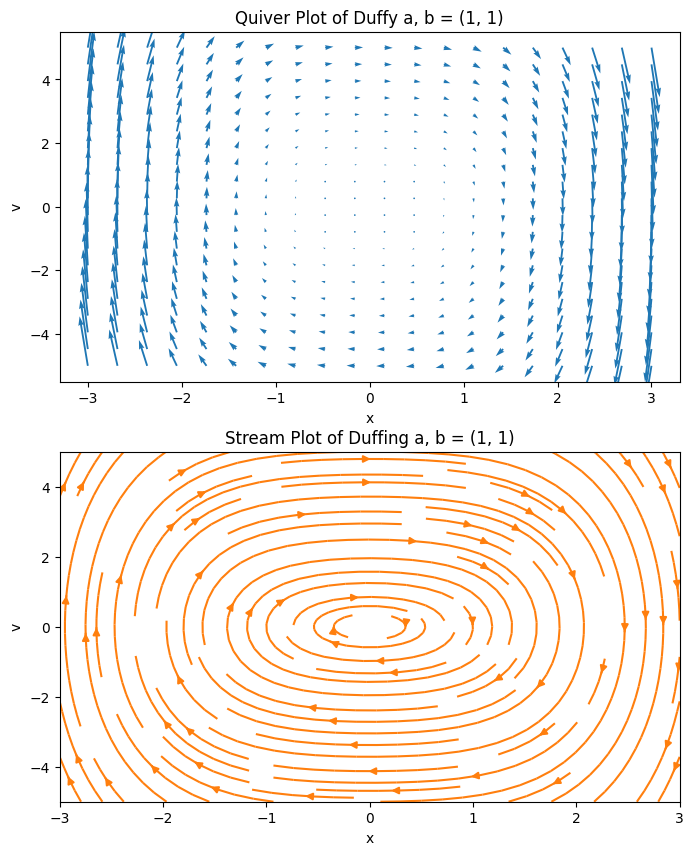

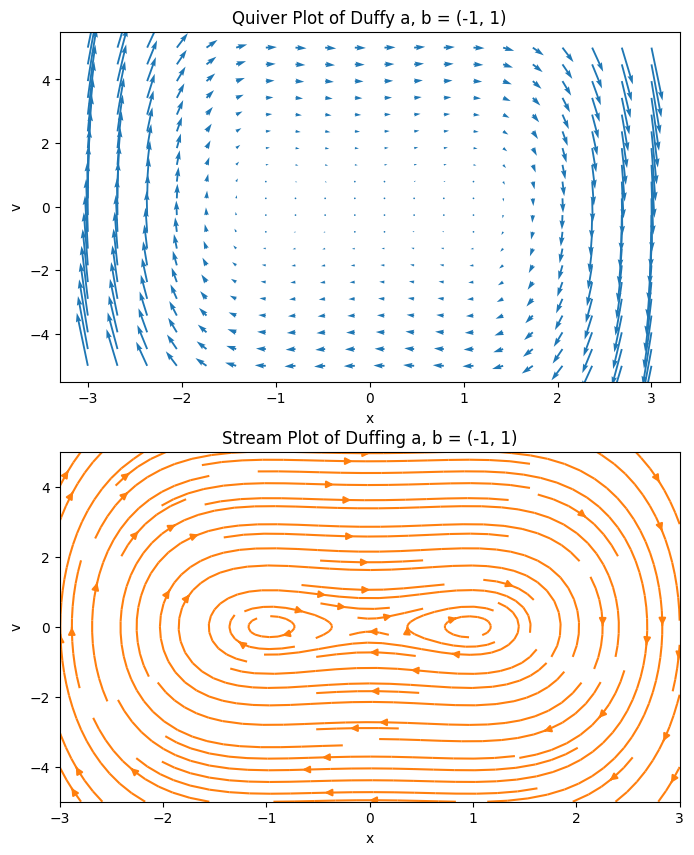

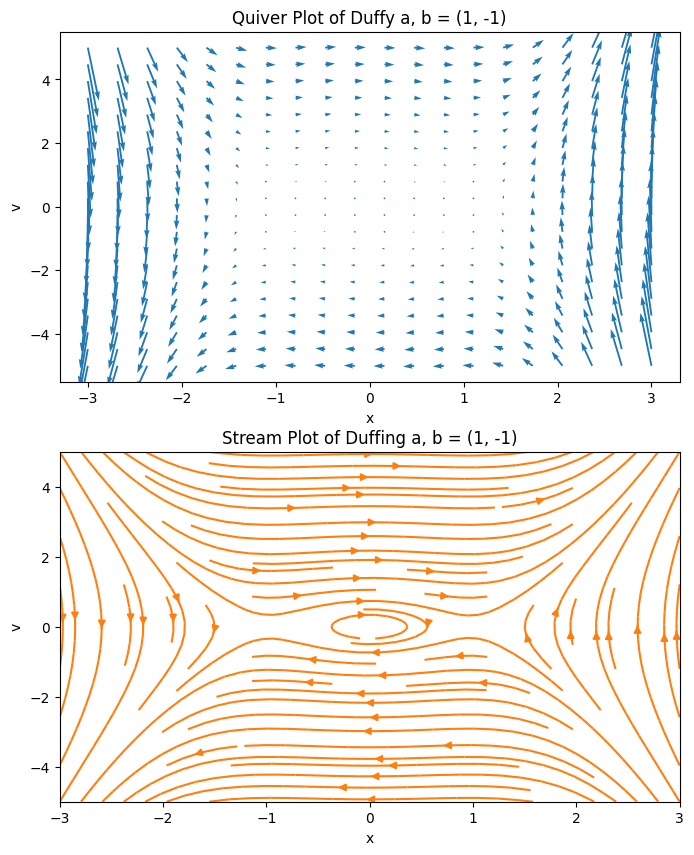

In [3]:


def duffing(x,v,a,b):
    dx = v
    dv = -a*x-b*x**3

    return dx, dv


def generate_phase_space(x_lim, v_lim, grid_size, a, b):

    x = np.linspace(x_lim[0], x_lim[1], grid_size)
    v = np.linspace(v_lim[0], v_lim[1], grid_size)
    
    X, V = np.meshgrid(x, v)
    
    dX, dV = duffing(X,V,a=a,b=b)
    
    return X, V, dX, dV

x_lim = (-3, 3)
v_lim = (-5, 5)
grid_size = 20

# Generate phase space
for a, b in [[1,1],[-1,1],[1,-1]]:

    X, V, dX, dV = generate_phase_space(x_lim, v_lim, grid_size, a, b)

    fig, axs = plt.subplots(2, 1, figsize=(8, 10))  # Two rows, one column

    # Quiver plot on the first subplot
    axs[0].quiver(X, V, dX, dV, color='C0')

    axs[0].set_title(f'Quiver Plot of Duffy a, b = {a, b}')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('v')

    # Stream plot on the second subplot
    axs[1].streamplot(X, V, dX, dV, color='C1')

    axs[1].set_title(f'Stream Plot of Duffing a, b = {a, b}')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('v');






4. (5 pt) **Here you are likely to need a numerical solver.**  Solve the equation of motion for the undriven and undamped case for a reasonable choice of $\alpha$ and $\beta$ and initial conditions. Plot the position as a function of time. What is the behavior of the system? Does it match your expectations from the potential and the phase portrait??



Let's go with Euler-Cromer. For the unstable a = -1, b = 1 case we have a very interesting pattern. This agrees with the phase diagram for the low initial velocity, low initial potential case. Speed decreases to zero while moving past the stable points at $x = \alpha/\beta = 1$ and decreases/increases as it moves towards/away from the unstable point at $x = 0$

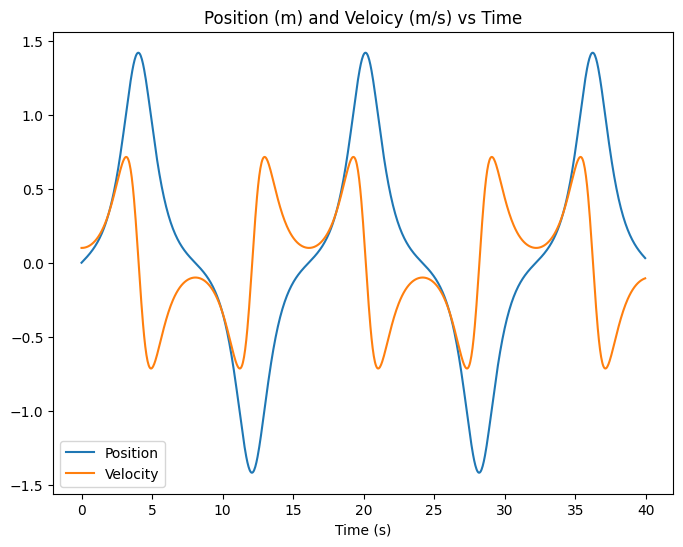

In [4]:
import pandas as pd

def euler_cromer(x0, v0, t0, tf, dt, a, b):
    t = np.arange(t0, tf, dt)
    x = np.zeros(t.shape)
    v = np.zeros(t.shape)
    x[0], v[0] = x0, v0

    for i in range(1, len(t)):
        
        v[i] = v[i-1] - dt * (a * x[i-1] + b * x[i-1] ** 3 ) # insert physics here
        x[i] = x[i-1] + dt * v[i]

    return t, x, v

x0 = 0
v0 = 0.1
t0, tf = 0, 40
dt = 0.04
a, b = -1, 1

t, x ,v = euler_cromer(x0, v0, t0, tf, dt, a , b)
euler_cromerdf = pd.DataFrame({'t': t, 'x': x, 'v': v})

plt.figure(figsize=(8, 6))
plt.plot(euler_cromerdf['t'], euler_cromerdf['x'], label='Position')
plt.plot(euler_cromerdf['t'], euler_cromerdf['v'], label='Velocity')
plt.title('Position (m) and Veloicy (m/s) vs Time')
plt.xlabel('Time (s)')
plt.legend()
#plt.ylabel('Position (m)')
plt.show()



#### Damped and undriven case (20 points)

5. (5 pt) Now consider the damped and undriven case, $\gamma = 0$. What is the equation of motion in this case? Can you develop this equation of motion fully from a potential (like we did above)? If so, what is the potential? If not, why not?
6. (5 pt) Plot the phase space for the damped and undriven case. What kinds of trajectories are there? 
7. (10 pt) **Here you are likely to need a numerical solver.**  Solve the equation of motion for the damped and undriven case for a reasonable choice of $\alpha$, $\beta$, $\delta$, and initial conditions. Plot the position as a function of time. What is the behavior of the system? Does it match your expectations from the phase portrait?



<div style="background-color:PaleGreen;color:black;padding:2%;">

5.
$$
\ddot x + \delta \dot x + \alpha x + \beta x^3 = 0 \\
\ddot x = -\delta \dot x -\alpha x - \beta x^3 \\ 
$$
This is a nonlinear equation, so it isn't really doable when it comes to developing it into a potential. We aren't making U be a function of position and velocity

6. and 7. See plots below. 

Depending on a and b, we can see a few different outcomes, which is kind of suprising considering that typically when we see damping we'll converge to x=v=0. For stable points at $x = \alpha / \beta$ we converge to those points, which makes logical sense. For $a,b = 1,-1$ some points converge to the central stable point, but others don't make the cut and velocity diverges to $\infty$ at $x=\infty$, since the potential drop outpaces the slowing from damping.

The solver plot is one where $\alpha/ \beta$ is stable according to our original potential formulation, and naturally it collapses to that point. 

</div>

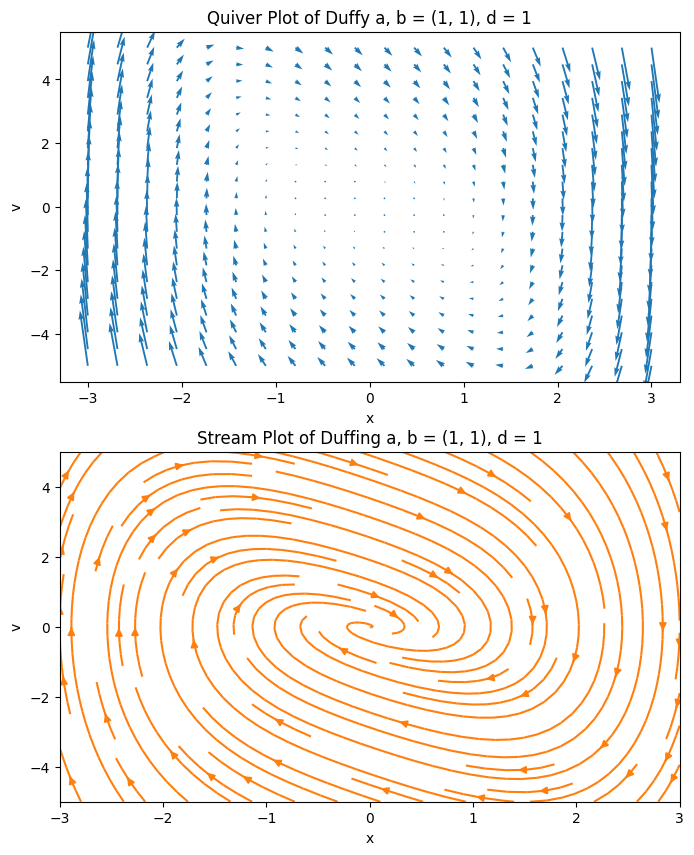

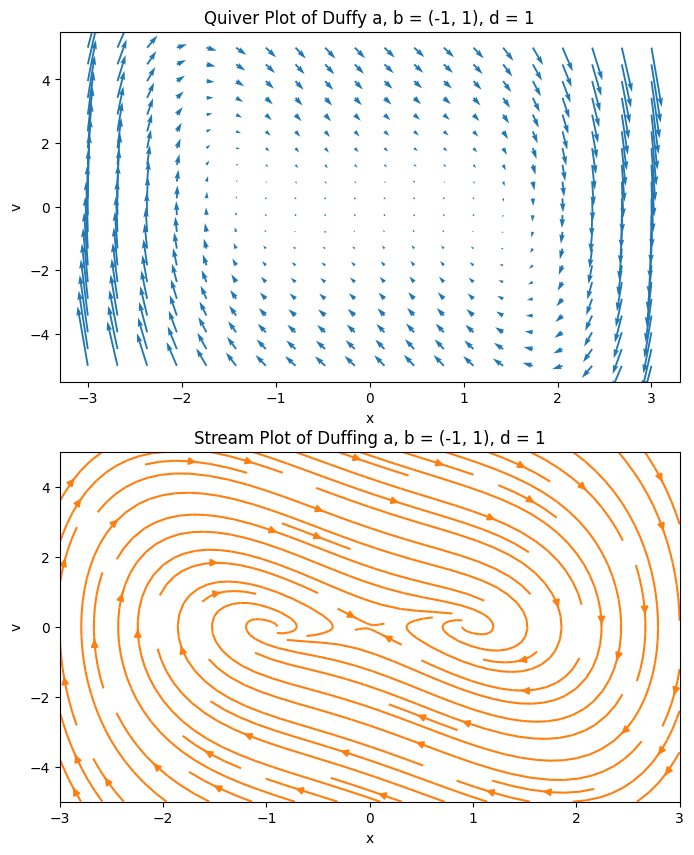

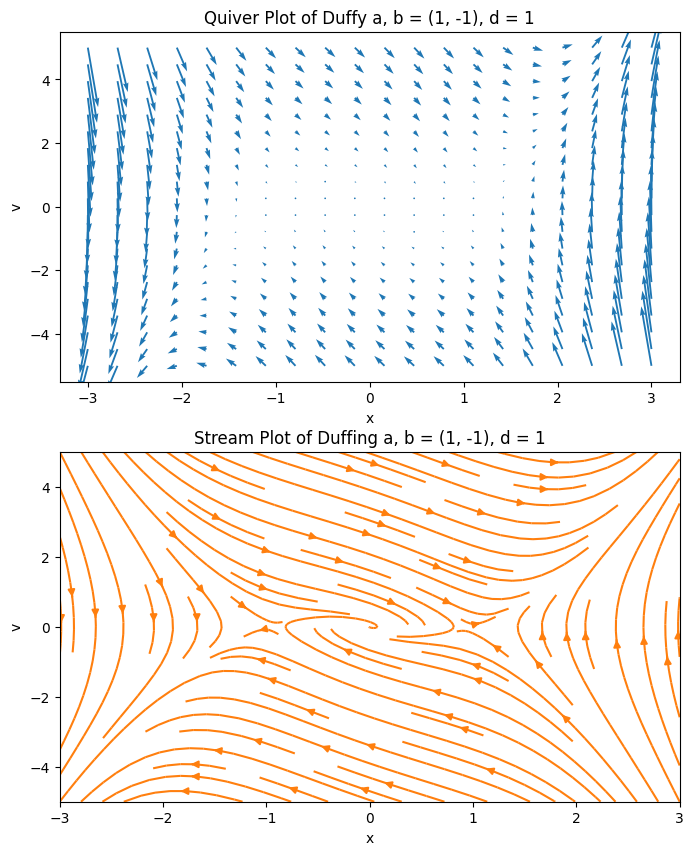

In [5]:
d = 1

def duffing(x,v,a,b,d):
    dx = v
    dv = -d*v-a*x-b*x**3

    return dx, dv


def generate_phase_space(x_lim, v_lim, grid_size, a, b, d):

    x = np.linspace(x_lim[0], x_lim[1], grid_size)
    v = np.linspace(v_lim[0], v_lim[1], grid_size)
    
    X, V = np.meshgrid(x, v)
    
    dX, dV = duffing(X,V,a=a,b=b,d=d)
    
    return X, V, dX, dV

x_lim = (-3, 3)
v_lim = (-5, 5)
grid_size = 20

# Generate phase space
for a, b in [[1,1],[-1,1],[1,-1]]:

    X, V, dX, dV = generate_phase_space(x_lim, v_lim, grid_size, a, b, d)

    fig, axs = plt.subplots(2, 1, figsize=(8, 10))  # Two rows, one column

    # Quiver plot on the first subplot
    axs[0].quiver(X, V, dX, dV, color='C0')

    axs[0].set_title(f'Quiver Plot of Duffy a, b = {a, b}, d = {d}')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('v')

    # Stream plot on the second subplot
    axs[1].streamplot(X, V, dX, dV, color='C1')

    axs[1].set_title(f'Stream Plot of Duffing a, b = {a, b}, d = {d}')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('v');




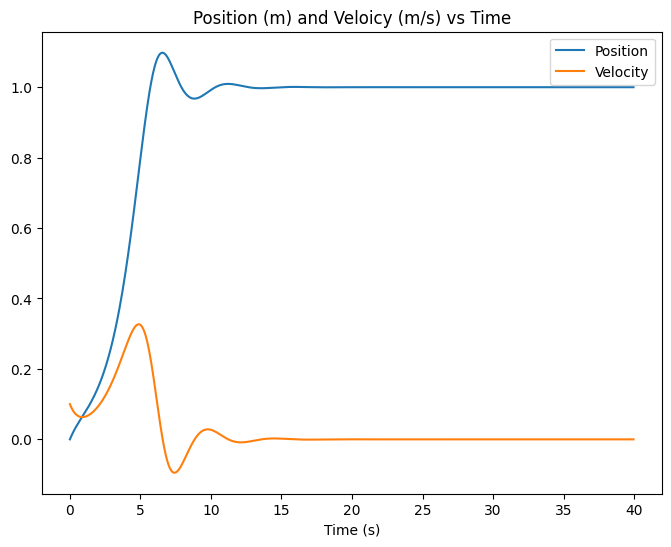

In [6]:
def euler_cromer(x0, v0, t0, tf, dt, a, b, g):
    t = np.arange(t0, tf, dt)
    x = np.zeros(t.shape)
    v = np.zeros(t.shape)
    x[0], v[0] = x0, v0

    for i in range(1, len(t)):
        
        v[i] = v[i-1] - dt * (g * v[i-1] + a * x[i-1] + b * x[i-1] ** 3 ) # insert physics here
        x[i] = x[i-1] + dt * v[i]

    return t, x, v

x0 = 0
v0 = 0.1
t0, tf = 0, 40
dt = 0.04
a, b = -1, 1
g = 1

t, x ,v = euler_cromer(x0, v0, t0, tf, dt, a , b, g)
euler_cromerdf = pd.DataFrame({'t': t, 'x': x, 'v': v})

plt.figure(figsize=(8, 6))
plt.plot(euler_cromerdf['t'], euler_cromerdf['x'], label='Position')
plt.plot(euler_cromerdf['t'], euler_cromerdf['v'], label='Velocity')
plt.title('Position (m) and Veloicy (m/s) vs Time')
plt.xlabel('Time (s)')
plt.legend()
#plt.ylabel('Position (m)')
plt.show()



#### Driven and damped case (20 points)

8. (5 pt) Now consider the damped and driven case, $\gamma \neq 0$. What is the equation of motion in this case? Can you develop this equation of motion fully from a potential (like we did above)? If so, what is the potential? If not, why not?
9. (5 pt) Is it possible to plot the phase space for the driven and damped case? Why or why not? What solutions are available to you to understand the behavior of the system in phase space? *Here we are not looking for you to solve the problem, but to conduct research into how people make sense of the behavior of driven and damped systems.*
10. (10 pt) **Here you are likely to need a numerical solver.**  Solve the equation of motion for the driven and damped case for a reasonable choice of $\alpha$, $\beta$, $\delta$, $\gamma$, $\omega$, and initial conditions. Plot the position as a function of time. What is the behavior of the system? 



<div style="background-color:PaleGreen;color:black;padding:2%;">
8. As before, we can't convert the whole equation of motion into a potential. Perhaps we can make the potential a function of time and position and then we can include the 'driven' portion, but we can't show it for all times without doing something really weird like making it 3D.

$$
\ddot x = \gamma\cos(\omega t) -\delta \dot x -\alpha x - \beta x^3 \\ 
$$

9. Again, the time component of the driver makes creating the phase space diagram a bit off. Phase space has no time component, so an additional dimension must be introduced another way. This can include going into 3D, slicing at different times/velocities, etc. 

I've gone ahead and made gifs to show the affects of the driver at different times.

10. Check it out. As we'd expect, it converges to a stable point, but the driver keeps it oscillating around that point.

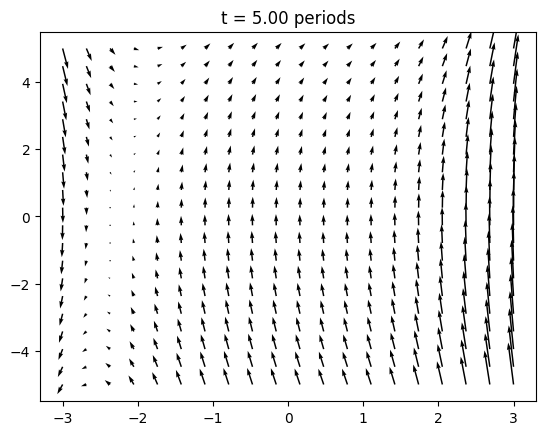

In [8]:
from matplotlib.animation import PillowWriter

fig = plt.figure()


# generate each frame

d = 1
g = 10 # using a relatively large gamma
omega = 2 * np.pi

def duffing(x,v,a,b,t):
    dx = v
    dv = g*np.cos(omega*t) -d*v-a*x-b*x**3

    return dx, dv


def generate_phase_space(x_lim, v_lim, grid_size, a, b, t):

    x = np.linspace(x_lim[0], x_lim[1], grid_size)
    v = np.linspace(v_lim[0], v_lim[1], grid_size)
    
    X, V = np.meshgrid(x, v)
    
    dX, dV = duffing(X,V,a=a,b=b,t=t)
    
    return X, V, dX, dV

x_lim = (-3, 3)
v_lim = (-5, 5)
grid_size = 20
a, b = 1, -1

X, V, dX, dV = generate_phase_space(x_lim, v_lim, grid_size, a, b, 0)

field1 = plt.quiver(X, V, dX, dV)

# creating the animation

metadata = dict(title='Movie', artist='AndrewKoren')
writer = PillowWriter(fps=15, metadata=metadata)

data = []

with writer.saving(fig, f'Driven_a={a}_b={b}.gif', 100):
    for tval in np.linspace(0,5,300):
        
        X, V, dX, dV = generate_phase_space(x_lim, v_lim, grid_size, a, b, tval)
        plt.title(f't = {tval:.2f} periods')
        field1.set_UVC(dX, dV)

        writer.grab_frame()


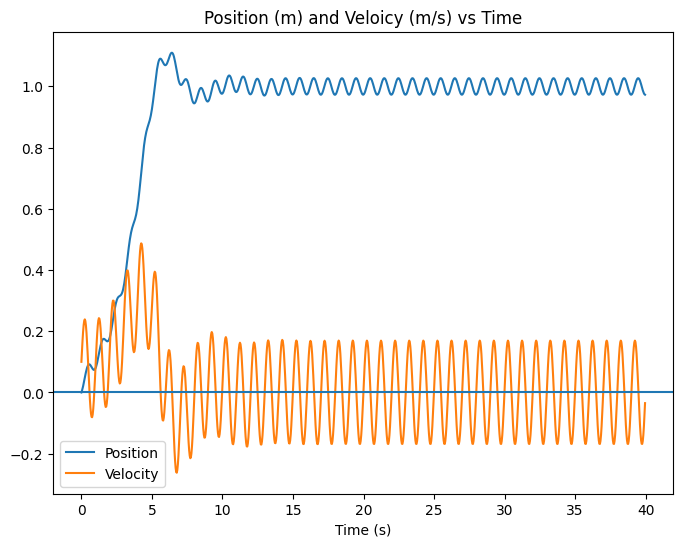

In [9]:
d = 1
g = 1
omega = 2 * np.pi


def euler_cromer(x0, v0, t0, tf, dt, a, b):
    t = np.arange(t0, tf, dt)
    x = np.zeros(t.shape)
    v = np.zeros(t.shape)
    x[0], v[0] = x0, v0

    for i in range(1, len(t)):
        
        v[i] = v[i-1] + dt * (g*np.cos(omega*t[i-1])-d * v[i-1] - a * x[i-1] - b * x[i-1] ** 3 ) # insert physics here
        x[i] = x[i-1] + dt * v[i]

    return t, x, v

x0 = 0
v0 = 0.1
t0, tf = 0, 40
dt = 0.04
a, b = -1, 1

t, x ,v = euler_cromer(x0, v0, t0, tf, dt, a , b)
euler_cromerdf = pd.DataFrame({'t': t, 'x': x, 'v': v})

plt.figure(figsize=(8, 6))
plt.plot(euler_cromerdf['t'], euler_cromerdf['x'], label='Position')
plt.plot(euler_cromerdf['t'], euler_cromerdf['v'], label='Velocity')
plt.axhline(0)
plt.title('Position (m) and Veloicy (m/s) vs Time')
plt.xlabel('Time (s)')
plt.legend()
#plt.ylabel('Position (m)')
plt.show()



#### Extra credit (up to 30 points)

11. (10 pts) The Duffing oscillator can be either a soft or hard spring by changing the sign of the $\alpha$ term. What happens to the behavior of the system when you change the sign of $\alpha$? Can you explain this behavior in terms of the potential?
12. (20 pts) A critical tool for understanding the behavior of the Duffing oscillator is the [Poincaré section](https://en.wikipedia.org/wiki/Poincar%C3%A9_map). Can you implement a Poincaré section for the driven and damped case? What does it tell you about the behavior of the system?


### Part 2, Signal Analysis (40pt)

We learned that any periodic function can be written using a Fourier series. The expansion we wrote is:

$$f(t) = \dfrac{a_0}{2} + \sum_{n=1}^{\infty} \left( a_n \cos(n\omega t) + b_n \sin(n\omega t) \right).$$

where $\omega = 2\pi/T$ and $T$ is the period of the function. The coefficients $a_n$ and $b_n$ are given by:

$$a_n = \dfrac{2}{T} \int_{-T/2}^{T/2} f(t) \cos(n\omega t) dt, \quad b_n = \dfrac{2}{T} \int_{-T/2}^{T/2} f(t) \sin(n\omega t) dt.$$

For this part of the midterm you will analyze a triangular wave both analytically and numerically.

Consider the following triangular wave:

$$f(t) = \begin{cases} 
      1 - 2t & 0 \leq t < 1/2 \\
      2t - 1 & 1/2 \leq t < 1
   \end{cases}$$

which repeats every $T = 1$.

1. (5 pt) Plot the triangular wave. What is the frequency of the wave? Show this on the plot.
2. (15 pt) Determine the Fourier coefficients $a_n$ and $b_n$ for the triangular wave. This should be done analytically.
3. (10 pt) What is the expression for the approximation of the triangular wave using the first few terms of the Fourier series?
3. (10 pt) Plot the Fourier series for the first few terms. How many terms do you need to get a good approximation of the triangular wave? Do you notice any problems with the Fourier series? If so, what are they?

1. Here's the plot. The frequency is $1/T = 1$ 

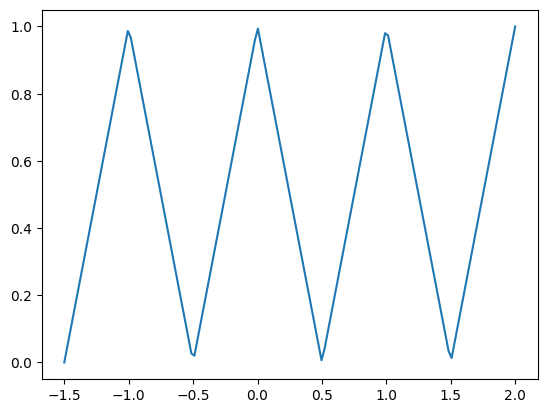

In [10]:
def trif(t):
    t = (t % 1).copy()
    value = t.copy()
    value[t<0.5] = 1 - 2 * t[t<0.5]
    value[t>= 0.5] = 2 * t[t>=0.5] - 1
    return value
    
times = np.linspace(-1.5,2,150)

plt.plot(times, trif(times));

2. Yay Fourier!

$$a_n = 2 \int_{-1/2}^{1/2} f(t) \cos(2\pi n t) dt, \quad b_n = 2 \int_{-1/2}^{1/2} f(t) \sin(2\pi n t) dt$$
Since the function isn't differentiable at t=0, lets split $a_n$ and $b_n$ into two integrals.

$$
a_n = 2 \int_{0}^{1/2} (1-2t) \cos(2\pi n t) dt + 2\int_{-1/2}^{0} (2t-1) \cos(2\pi nt) dt \\
b_n = 2 \int_{0}^{1/2} (1-2t) \sin(2\pi n t) dt + 2\int_{-1/2}^{0} (2t-1) \sin(2\pi nt) dt
$$
However, this isn't quite right. Integrating below 0 means that we must add 1 to t in order for it to yield the curve we observe in the graph above (note this is the same as changing the integral to $1/2\rightarrow 1$)
$$
a_n = 2 \int_{0}^{1/2} (1-2t) \cos(2\pi n t) dt + 2\int_{1/2}^{1} (2t-1) \cos(2\pi nt) dt \\
b_n = 2 \int_{0}^{1/2} (1-2t) \sin(2\pi n t) dt + 2\int_{1/2}^{1} (2t-1) \sin(2\pi nt) dt
$$
Using a lookup table I get this down to

$$
a_n = \frac{2\sin^2(\pi n/2)}{\pi^2n^2} + \frac{\pi n \sin(2 \pi n) - \cos(\pi n) + \cos(2 \pi n)}{\pi^2n^2} \\
b_n = \frac{\pi n - \sin(\pi n)}{\pi^2n^2} - \frac{\sin(\pi n) - \sin(2\pi n) + \pi n \cos(2\pi n)}{\pi^2n^2} \\
$$


3. Lets get some $a_n$ and $b_n$ terms

$$
a_0 = \dots
$$
Oops. $\cos(0)=1$ so $a_0$ is just two times the integral of $f(t)$

$$
a_0 = 2\int_{0}^{1} f(t) dt = \left. (t-t^2) \right|_0^{1/2} + \left.(t^2-t)\right|_{1/2}^1 = 1
$$


Now to get back on track

$$
a_1 = \frac{2 + 1 + 1}{\pi^2} = \frac{4}{\pi^2} \\
b_1 = 0 \\
a_2 = 0 \\
b_2 = 0 \\
a_3 = \frac{4}{9\pi^2} \\
b_3 = 0
$$

This gives us

$$
f(t) = 1/2 + \frac{4}{\pi^2}\cos(2\pi t) + \frac{4}{3\pi} \cos(6 \pi t)
$$

It's okay, we'll have plenty of chances to find more values as we implement question 4

4. Lets make a ton of functions and add them together. It turns out the approximate function I made in part 3 using only two cosine functions isn't so bad, but it takes 4 to start looking triangular. The fourier series seems to have trouble with sharp peaks, but the differences aren't visible in the plot once we're at n = 10

0.02019760659987868 -0.020197606599878067


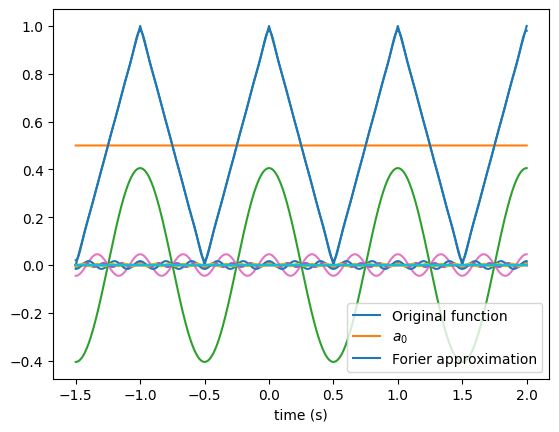

In [76]:
from numpy import pi, sin, cos

times = np.linspace(-1.5,2,2500)
omega = 2 * pi

a0 = 1/2

def a_n(t,n):
    return (2 * (sin(pi * n / 2) ** 2) +  pi * n * sin(2 * pi * n) - cos(pi * n) + cos(2*pi*n) )/(pi*pi*n*n) * cos(n * omega * t)

def b_n(t,n):
    return (pi * n - sin(pi * n) - sin(pi * n) + sin(2*pi*n) - pi*n*cos(2* pi * n))/(pi*n)*sin(n* omega *t)

plt.plot(times, trif(times), label = 'Original function')

sums = np.zeros_like(times)

sums += a0
plt.plot(times,sums, label = r'$a_0$')

for n in range(1, 10):
    plt.plot(times,a_n(times,n))#, label = f'n={n}')
    plt.plot(times,b_n(times,n))#,label=f'n={n}')
    sums += a_n(times, n) + b_n(times, n)

residual = trif(times) - sums
print(max(residual),min(residual))

plt.plot(times, sums, label = 'Forier approximation')

plt.xlabel(r'time (s)')
plt.legend()
plt.show()